# Importation librairies

In [52]:
from KMeansAMoi import test
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score


# Iris

## Importation class KMeans

In [53]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

In [54]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

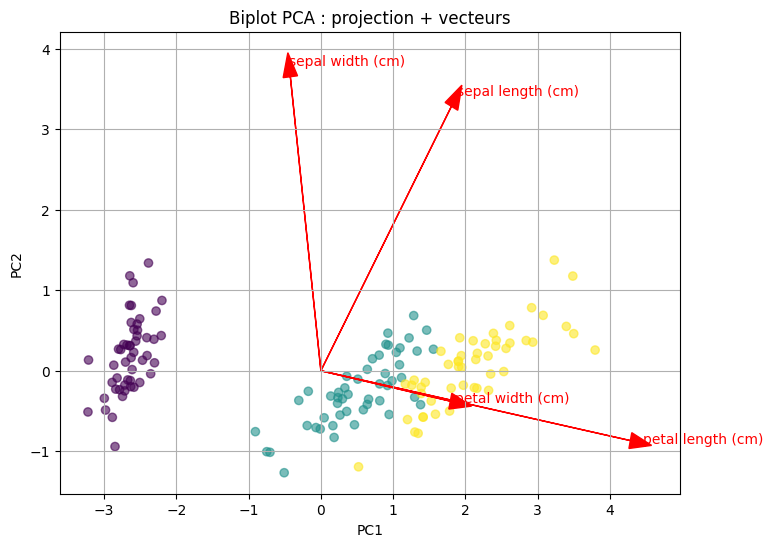

In [55]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.6)

# Ajouter les flèches (vecteurs propres)
for i in range(pca.components_.shape[1]):
    plt.arrow(0, 0, 
              pca.components_[0, i]*5, 
              pca.components_[1, i]*5, 
              color='r', head_width=0.2)
    plt.text(pca.components_[0, i]*5.2, 
             pca.components_[1, i]*5.2, 
             feature_names[i], color='r')

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Biplot PCA : projection + vecteurs")
plt.grid(True)
plt.show()

In [56]:
kmeans = test(k=3)
kmeans.fit(X)
labels = kmeans.predict(X)

Le modèle est lancé avec K = 3 car c'est le nombre de cluster du dataset de base

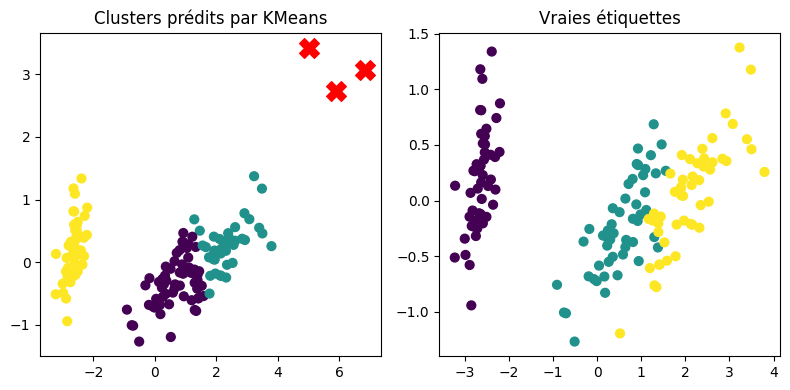

In [57]:
plt.figure(figsize=(8, 4))

# Clusters trouvés par KMeans
plt.subplot(1, 2, 1)
plt.title("Clusters prédits par KMeans")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=40)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], marker='X', c='red', s=200)

# Vraies classes
plt.subplot(1, 2, 2)
plt.title("Vraies étiquettes")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=40)

plt.tight_layout()
plt.show()

## Importation KMeans Scikit-Learn

In [58]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

c:\Users\aubru\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


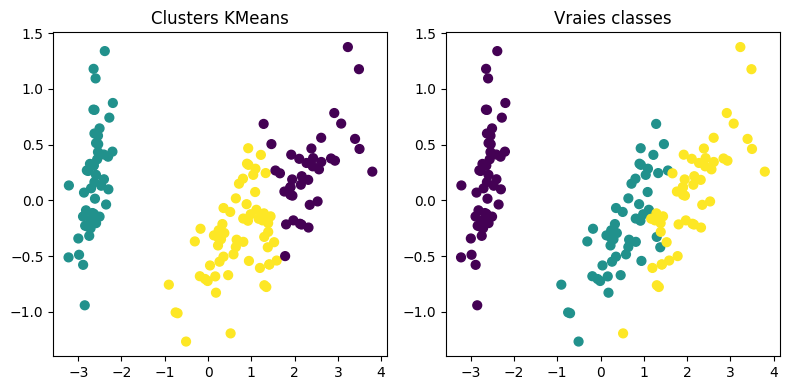

In [59]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.title("Clusters KMeans")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=40)

plt.subplot(1, 2, 2)
plt.title("Vraies classes")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=40)

plt.tight_layout()
plt.show()

Test avec different nombre de cluster

In [60]:
kmeans2 = KMeans(n_clusters=2, random_state=42)
kmeans2.fit(X)
labels2 = kmeans2.labels_
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

c:\Users\aubru\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


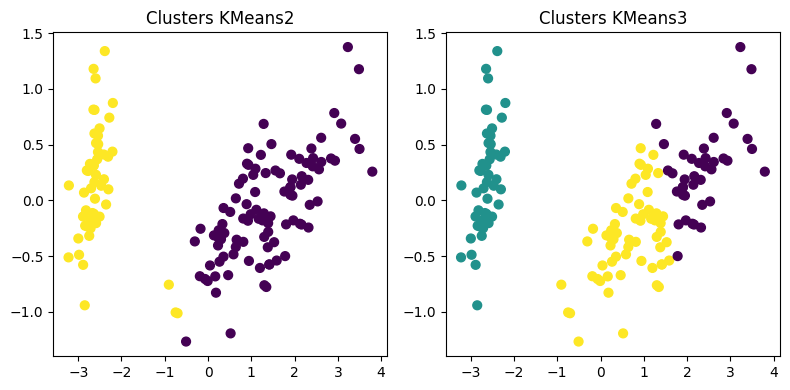

In [61]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.title("Clusters KMeans2")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels2, cmap='viridis', s=40)

plt.subplot(1, 2, 2)
plt.title("Clusters KMeans3")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=40)

plt.tight_layout()
plt.show()

In [62]:
kmeans4 = KMeans(n_clusters=4, random_state=42)
kmeans4.fit(X)
labels4 = kmeans4.labels_
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

c:\Users\aubru\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [63]:
kmeans5 = KMeans(n_clusters=5, random_state=42)
kmeans5.fit(X)
labels5 = kmeans5.labels_
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

c:\Users\aubru\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


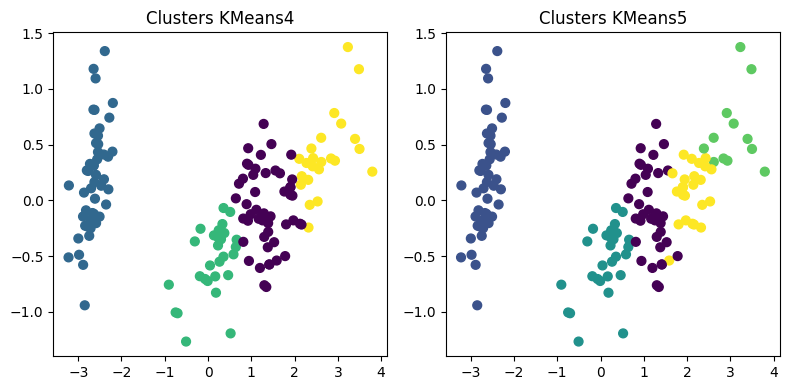

In [64]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.title("Clusters KMeans4")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels4, cmap='viridis', s=40)

plt.subplot(1, 2, 2)
plt.title("Clusters KMeans5")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels5, cmap='viridis', s=40)



plt.tight_layout()
plt.show()

Pour définir le nombre optimal de clusters, on utilise la méthode du coude qui compare l'inertie des resultats des differents nombre de clusteurs pour determiné visuellemnt le plus optimal

In [65]:
inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

c:\Users\aubru\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\aubru\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\aubru\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\aubru\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

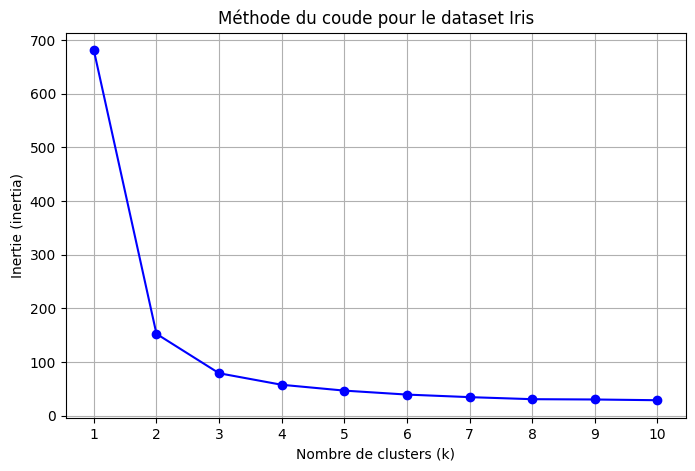

In [66]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie (inertia)')
plt.title("Méthode du coude pour le dataset Iris")
plt.xticks(k_range)
plt.grid(True)
plt.show()

Le nombre optimal de clusters est donc 3 car après celui-ci, on voit que la courbe converge

# Marketing Campaign

## Exploration et analyse des données

Exploration des données

In [67]:
df = pd.read_csv("marketing_campaign.csv")
df.info()
df['Seniority']=pd.to_datetime(df['Dt_Customer'], dayfirst=True,format = '%d-%m-%Y')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [68]:
df.describe(include='all')


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Seniority
count,2240.000000,2240.000000,2240,2240,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240
unique,NaN,NaN,5,8,NaN,NaN,NaN,663,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,31-08-2012,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1127,864,NaN,NaN,NaN,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5592.159821,1968.805804,NaN,NaN,52247.251354,0.444196,0.506250,NaN,49.109375,303.935714,...,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,2013-07-10 10:01:42.857142784
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2012-07-30 00:00:00
25%,2828.250000,1959.000000,NaN,NaN,35303.000000,0.000000,0.000000,NaN,24.000000,23.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2013-01-16 00:00:00
50%,5458.500000,1970.000000,NaN,NaN,51381.500000,0.000000,0.000000,NaN,49.000000,173.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2013-07-08 12:00:00
75%,8427.750000,1977.000000,NaN,NaN,68522.000000,1.000000,1.000000,NaN,74.000000,504.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2013-12-30 06:00:00
max,11191.000000,1996.000000,NaN,NaN,666666.000000,2.000000,2.000000,NaN,99.000000,1493.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,2014-06-29 00:00:00


In [69]:
df.head ()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Seniority
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,2012-09-04
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,2014-03-08
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,2013-08-21
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,2014-02-10
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,2014-01-19


Vérifier les valeurs manquantes

In [70]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Seniority               0
dtype: int64

Supprimer colonnes non informatives

In [71]:
df = df.drop(['ID', 'Dt_Customer'], axis=1)

Supprimer ou imputer les valeurs manquantes

In [72]:
df = df.dropna()

Colonnes catégorielles

In [73]:
cat_cols = ['Education', 'Marital_Status']

Colonnes numériques

In [74]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.difference(cat_cols)

Pipeline de prétraitement

In [75]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first'), cat_cols)
])

df_preprocessed = preprocessor.fit_transform(df)
df_preprocessed.shape

(2216, 36)

## Réduction de dimension par sélection de features ou MFA

In [76]:
pca = PCA(n_components=5)
df_pca = pca.fit_transform(df_preprocessed)

Affichage des composants utilisés dans le PCA

In [105]:
# Step 2: Get transformed column names
num_features = preprocessor.named_transformers_['num'].get_feature_names_out(num_cols)
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_cols)
all_features = list(num_features) + list(cat_features)

# Step 5: Create loadings DataFrame
loadings = pd.DataFrame(pca.components_.T, 
                        columns=[f'PC{i+1}' for i in range(pca.n_components_)],
                        index=all_features)

n = 5
top_n_per_pc = {}

# for pc in loadings.columns:
#     top_n_per_pc[pc] = loadings[pc].abs().sort_values(ascending=False).head(n)

top_n_per_pc[loadings.columns[0]] = loadings[loadings.columns[0]].abs().sort_values(ascending=False).head(n)

# Display
for pc, features in top_n_per_pc.items():
    print(f"\nTop {n} features for {pc}:")
    print(features)



Top 5 features for PC1:
NumCatalogPurchases    0.318552
MntMeatProducts        0.314297
MntWines               0.305924
Income                 0.291521
NumStorePurchases      0.282693
Name: PC1, dtype: float64


Visualisation

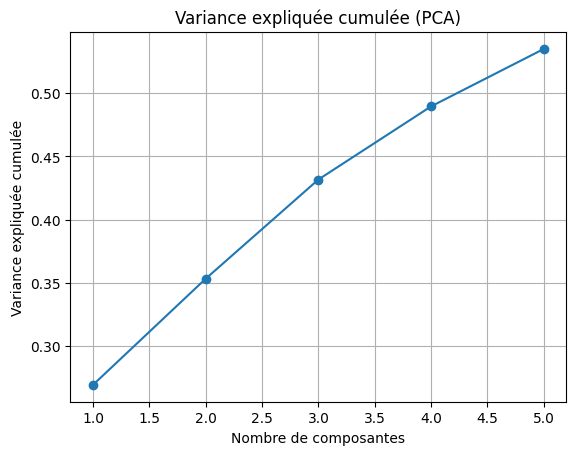

In [78]:
n_components = len(pca.explained_variance_ratio_)
plt.plot(range(1, n_components + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title("Variance expliquée cumulée (PCA)")
plt.xlabel("Nombre de composantes")
plt.ylabel("Variance expliquée cumulée")
plt.grid(True)
plt.show()

### Pour une visualisation plus poussée, lancer le fichier PCA_vizualisation.py

## Appliquer 3 algorithmes de classification non supervisée

Kmeans

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df_pca)

In [80]:
inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    inertias.append(kmeans.inertia_)

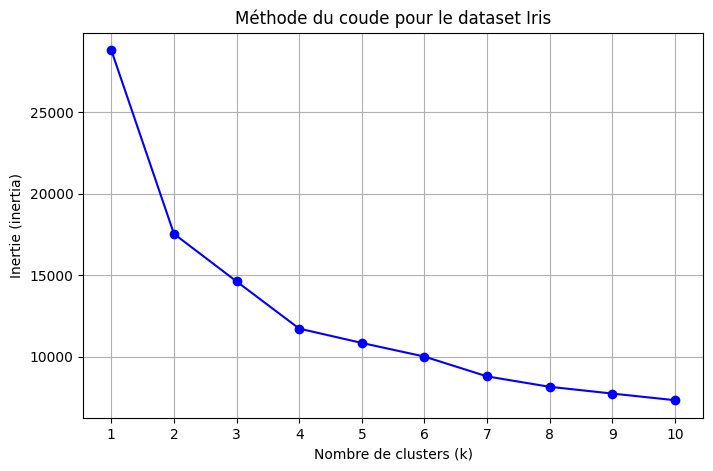

In [81]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie (inertia)')
plt.title("Méthode du coude pour le dataset Iris")
plt.xticks(k_range)
plt.grid(True)
plt.show()

dbscan

In [ ]:
dbscan = DBSCAN(eps=2, min_samples=3)
dbscan_labels = dbscan.fit_predict(df_pca)

Clustering hiérarchique

In [ ]:
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(df_pca)

## Comparer les résultats et évaluer les modèles

In [83]:


print("Silhouette - KMeans:", silhouette_score(df_pca, kmeans_labels))
print("Silhouette - DBSCAN:", silhouette_score(df_pca, dbscan_labels))
print("Silhouette - Agglomerative:", silhouette_score(df_pca, agglo_labels))

Silhouette - KMeans: 0.3522722227783146
Silhouette - DBSCAN: 0.30911189968312436
Silhouette - Agglomerative: 0.30037837447189625


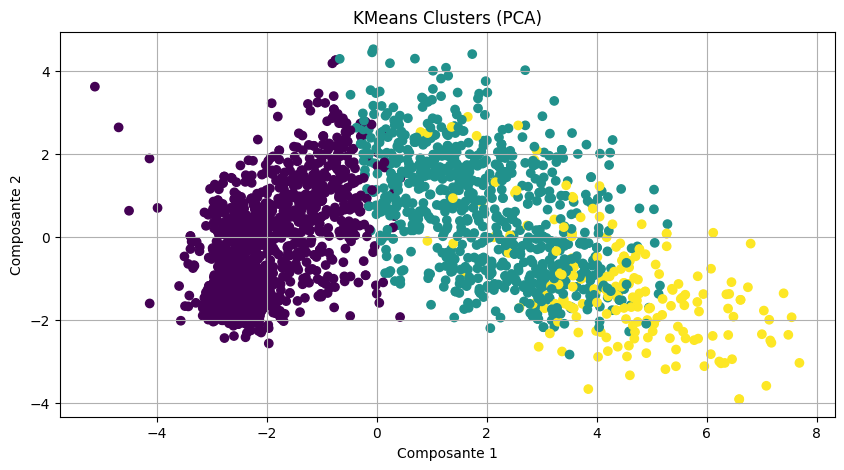

In [84]:


plt.figure(figsize=(10, 5))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("KMeans Clusters (PCA)")
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")
plt.grid(True)
plt.show()


## Profiling des groupes (analyse des caractéristiques)

In [85]:
df['Cluster_KMeans'] = kmeans_labels

# Profiling par cluster
group_profile = df.groupby('Cluster_KMeans').mean(numeric_only=True)
group_profile

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
Cluster_KMeans,,,,,,,,,,,,,,,,,,,,,
0,1970.605414,37268.334701,0.737490,0.520919,48.515997,79.241181,5.600492,31.488925,8.374897,5.540607,...,6.497129,0.070550,0.028712,0.000000,0.005742,0.001641,0.011485,3.0,11.0,0.100902
1,1965.826633,67862.888191,0.087940,0.575377,49.948492,511.530151,49.904523,292.507538,70.487437,49.629397,...,4.065327,0.055276,0.060302,0.018844,0.041457,0.000000,0.007538,3.0,11.0,0.113065
2,1969.850746,81248.507463,0.049751,0.134328,48.318408,857.263682,58.975124,491.751244,85.014925,67.845771,...,3.139303,0.164179,0.402985,0.731343,0.507463,0.139303,0.004975,3.0,11.0,0.597015


In [102]:
df['Cluster_KMeans'] = kmeans_labels
# Group by cluster and calculate means of selected features
df.groupby('Cluster_KMeans')[[
    "NumCatalogPurchases", 
    "MntMeatProducts", 
    "MntWines", 
    "Income", 
    "NumStorePurchases"
]].mean()

,NumCatalogPurchases,MntMeatProducts,MntWines,Income,NumStorePurchases
Cluster_KMeans,,,,,
0,0.739130,31.488925,79.241181,37268.334701,3.630025
1,4.723618,292.507538,511.530151,67862.888191,8.522613
2,6.258706,491.751244,857.263682,81248.507463,8.189055


## Conclusion

Trois clusters sont créers avec l'algorithme kmeans qui est le plus performant avec ce jeux de donées.  
C'est trois clusters sont princpalement différenciés par :  
NumCatalogPurchases : Nombre d’achats effectués à l’aide d’un catalogue  
MntMeatProducts : Montant dépensé pour la viande au cours des 2 dernières années  
MntWines : Montant dépensé en vin au cours des 2 dernières années  
Income : Revenu annuel du ménage du client  
NumStorePurchases : Nombre d’achats effectués directement dans les magasins  